In [1]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from src.datasets import load_train_test
from src.portfolio import Portfolio

import numpy as np
import pandas as pd
import warnings
pd.options.mode.chained_assignment = None
warnings.simplefilter(action='ignore', category=FutureWarning)

2024-03-02 23:28:17.536709: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 23:28:17.536750: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 23:28:17.537493: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 23:28:17.542291: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 23:28:18.177444: W tensorflow/compiler/tf2

In [2]:

def train(X_train, y_train, num_epochs, batch_size, learning_rate):
    model = Sequential()
    model.add(LSTM(units=X_train.shape[2], input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(units=y_train.shape[1]))  # output for optimal weights for next week.

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, validation_split=0.2, verbose=1)
    return model

tickers = ['V', 'GOOGL', 'T', 'JNJ', 'DIS']
start = '2013-01-01'
end = '2023-12-31'
num_epochs=1024
batch_size=32
learning_rate=0.001

yfdata, features, targets, X, y, y_price = load_train_test(tickers, start, end)

print('========= Original Dataset =========')
print('features', features.shape, 'columns', features.index[0], features.index[-1])
print('targets', targets.shape, 'columns', targets.index[0], targets.index[-1])
print('X', X.shape)
print('y', y.shape)
print('y_price', y_price.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print('========= Train / Test Dataset =========')
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)
print('y_price', y_price.shape)


[*********************100%%**********************]  5 of 5 completed


---- Creating Training Set
(2735, 108)
(2735, 6)
(2735, 6)
========= Original Dataset =========
features (2735, 108) columns 2013-02-20 00:00:00 2023-12-29 00:00:00
targets (2735, 6) columns 2013-02-20 00:00:00 2023-12-29 00:00:00
X (545, 10, 108)
y (545, 6)
y_price (545, 6)
========= Train / Test Dataset =========
X_train (436, 10, 108)
X_test (109, 10, 108)
y_train (436, 6)
y_test (109, 6)
y_price (545, 6)


In [3]:

model = train(X_train, y_train, num_epochs, batch_size, learning_rate)

2024-03-02 23:28:20.419877: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-02 23:28:20.440285: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-02 23:28:20.440959: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-02 23:28:20.442953: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-02 23:28:20.443643: I external/local_xla/xla/stream_executor

Epoch 1/1024


2024-03-02 23:28:24.640768: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8902


11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.1112 - loss: 0.4158 - val_accuracy: 0.1477 - val_loss: 0.2584
Epoch 2/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1724 - loss: 0.2659 - val_accuracy: 0.1591 - val_loss: 0.2082
Epoch 3/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1613 - loss: 0.1992 - val_accuracy: 0.1591 - val_loss: 0.1727
Epoch 4/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1752 - loss: 0.1676 - val_accuracy: 0.1477 - val_loss: 0.1479
Epoch 5/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.1674 - loss: 0.1381 - val_accuracy: 0.1705 - val_loss: 0.1340
Epoch 6/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.2138 - loss: 0.1310 - val_accuracy: 0.1705 - val_loss: 0.1256
Epoch 7/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.1975 - loss: 0.1224 - val_accuracy: 0.1932 - val_loss: 0.1207
Epoch 8/1024
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.2040 - loss: 0.1127 - val_accuracy: 0.2045 - val

In [4]:
y_test_price = y_price[-1*len(y_test):]

optimal_portfolio = Portfolio.portfolio_returns('optimal', y_test, y_test_price)
model_portfolio = Portfolio.portfolio_returns('model', model.predict(X_test), y_test_price)

one_over_n = np.ones(y_test_price.shape)
one_over_n[:,-1] = 0
one_over_n = one_over_n / len(tickers)

oneovern_portfolio = Portfolio.portfolio_returns('oneovern', one_over_n, y_test_price)

overall = optimal_portfolio.join(model_portfolio).join(oneovern_portfolio)

print(overall)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
            optimal_returns  optimal_cumrets  model_returns  model_cumrets  \
2021-11-05         0.009535         1.009535      -0.020758       0.979242   
2021-11-12         0.001555         1.011105       0.016359       0.995261   
2021-11-19         0.000137         1.011243      -0.005605       0.989683   
2021-11-29         0.025129         1.036654      -0.008544       0.981227   
2021-12-06         0.035510         1.073466       0.012513       0.993505   
...                     ...              ...            ...            ...   
2023-11-27         0.041554        26.036399       0.025343       1.059160   
2023-12-04         0.033130        26.898994       0.007108       1.066688   
2023-12-08         0.007253        27.094091      -0.006088       1.060194   
2023-12-15         0.062145        28.777861       0.006255       1.066826   
2023-12-22         0.000000        28.777861       0.000000       1.066826   

            oneovern_retu

In [5]:
overall[['optimal_returns', 'model_returns', 'oneovern_returns']].mean() / overall[['optimal_returns', 'model_returns', 'oneovern_returns']].std()

optimal_returns     1.083371
model_returns       0.036625
oneovern_returns   -0.006064
dtype: float64

<Axes: >

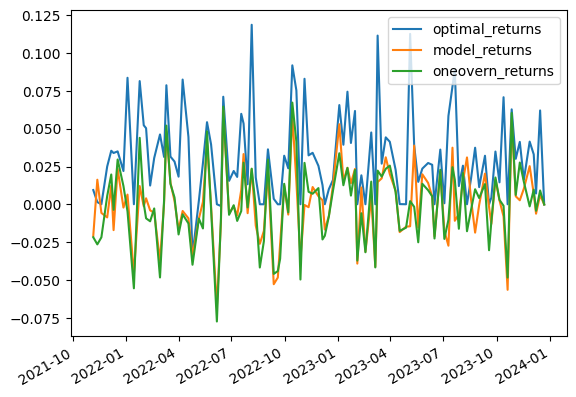

In [6]:
overall[['optimal_returns', 'model_returns', 'oneovern_returns']].plot()

<Axes: >

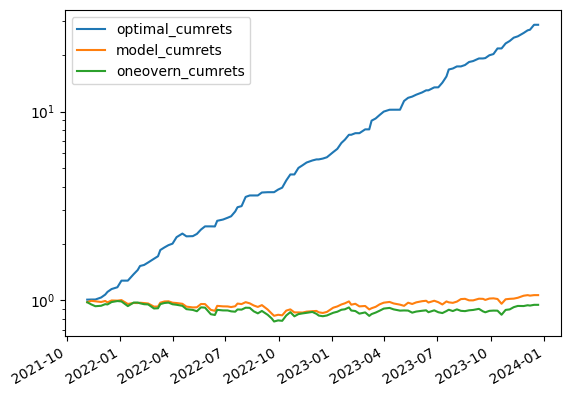

In [8]:
overall[['optimal_cumrets', 'model_cumrets', 'oneovern_cumrets']].plot(logy=True)